In [1]:
import pandas as pd
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('./res(2).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   项目      793 non-null    object
 1   2001    793 non-null    int64 
 2   2002    793 non-null    int64 
 3   2003    793 non-null    int64 
 4   2004    793 non-null    int64 
 5   2005    793 non-null    int64 
 6   2006    793 non-null    int64 
 7   2007    793 non-null    int64 
 8   2008    793 non-null    int64 
 9   2009    793 non-null    int64 
 10  2010    793 non-null    int64 
 11  2011    793 non-null    int64 
 12  2012    793 non-null    int64 
 13  2013    793 non-null    int64 
 14  2014    793 non-null    int64 
 15  2015    793 non-null    int64 
 16  2016    793 non-null    int64 
 17  2017    793 non-null    int64 
 18  2018    793 non-null    int64 
 19  2019    793 non-null    int64 
 20  2020    793 non-null    int64 
 21  20010   793 non-null    int64 
 22  20020   793 non-null    in

In [3]:
df.iloc[0]


项目       AdapterDelegates
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    2
2016                   16
2017                    0
2018                    0
2019                    4
2020                    0
20010                   0
20020                   0
20030                   0
20040                   0
20050                   0
20060                   0
20070                   0
20080                   0
20090                   0
20100                   0
20110                   0
20120                   0
20130                   0
20140                   0
20150                   0
20160                   0
20170                   0
20180       

In [4]:
new_df = pd.DataFrame({'project':[],
                       '2001':[],'2002':[],'2003':[],'2004':[],'2005':[],
                       '2006':[],'2007':[],'2008':[],'2009':[],'2010':[],
                       '2011':[],'2012':[],'2013':[],'2014':[],'2015':[],
                       '2016':[],'2017':[],'2018':[],'2019':[],'2020':[]})
for i in tqdm(range(len(df))):
    temp_series = df.iloc[i]
    t = temp_series.to_list()[1:]
    ratio = [(t[i+20]/t[i])*100 if t[i]!=0 else np.nan for i in range(20)]
    new_df.loc[len(new_df)] = {'project':temp_series['prj'],
                       '2001':ratio[0],'2002':ratio[1],'2003':ratio[2],'2004':ratio[3],'2005':ratio[4],
                       '2006':ratio[5],'2007':ratio[6],'2008':ratio[7],'2009':ratio[8],'2010':ratio[9],
                       '2011':ratio[10],'2012':ratio[11],'2013':ratio[12],'2014':ratio[13],'2015':ratio[14],
                       '2016':ratio[15],'2017':ratio[16],'2018':ratio[17],'2019':ratio[18],'2020':ratio[19]}



100%|██████████| 793/793 [00:02<00:00, 362.68it/s]


In [9]:
new_df.to_excel('./code reuse ratio in each year of the project.xlsx',index=False)



In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   project  793 non-null    object 
 1   2001     1 non-null      float64
 2   2002     2 non-null      float64
 3   2003     3 non-null      float64
 4   2004     5 non-null      float64
 5   2005     4 non-null      float64
 6   2006     9 non-null      float64
 7   2007     13 non-null     float64
 8   2008     22 non-null     float64
 9   2009     29 non-null     float64
 10  2010     54 non-null     float64
 11  2011     81 non-null     float64
 12  2012     128 non-null    float64
 13  2013     188 non-null    float64
 14  2014     261 non-null    float64
 15  2015     376 non-null    float64
 16  2016     452 non-null    float64
 17  2017     466 non-null    float64
 18  2018     411 non-null    float64
 19  2019     377 non-null    float64
 20  2020     304 non-null    float64
dtypes: float64(20), 

In [11]:
len(new_df['2008'].dropna())

22

year mean:  [0.0, 1.0776238496452875, 1.1225483448368931, 2.7634768397886185, 5.158613150809979, 6.565639677259851, 6.506394432729098, 6.59944086474316, 7.859326568483938, 7.494368134361726, 7.86091248259049, 6.890769096711361, 8.403048135940825]


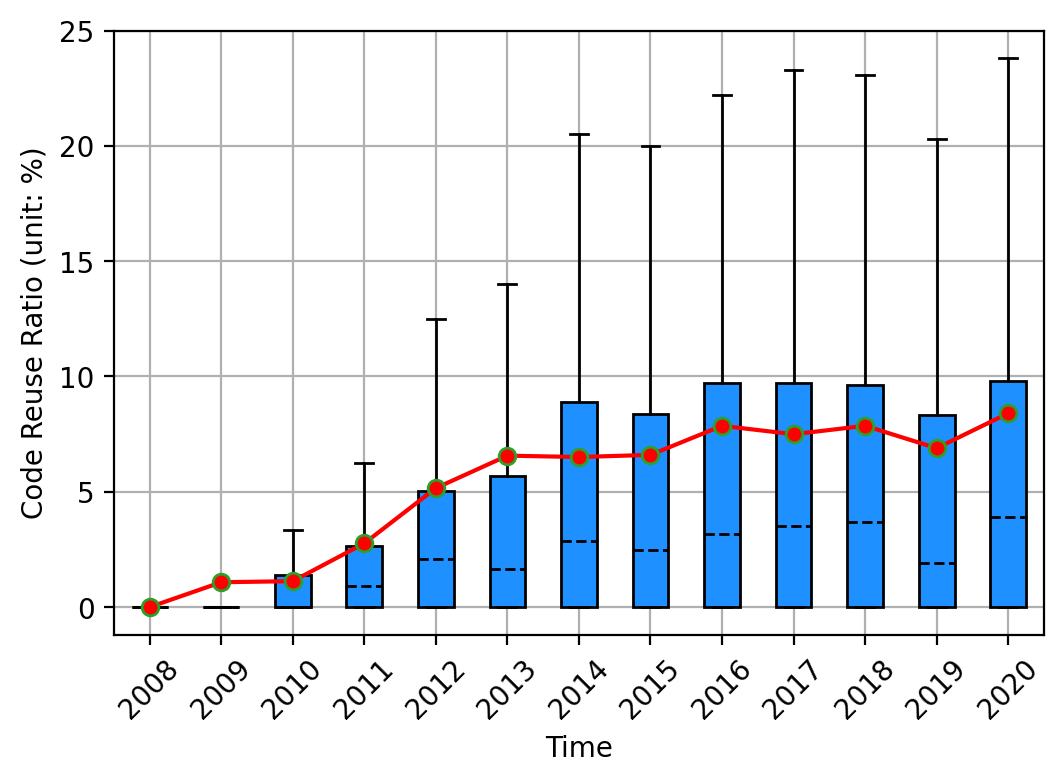

In [5]:
year_info = []

for i in range(2008, 2021):
    year_info.append(new_df[str(i)].dropna().to_list())


import math
mean_year = []
for year_list in year_info:
    mean_year.append(np.mean(year_list))
print('year mean: ', mean_year)

plt.figure(dpi=200)

pos = [i for i in range(13)]

plt.boxplot(year_info,
            labels = [i for i in range(2008, 2021)],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            medianprops = {'linestyle':'--','color':'black'},
            positions=pos)
plt.plot(pos,mean_year,color='red')
plt.grid()
plt.ylabel('Code Reuse Ratio (unit: %)')
plt.xlabel("Time")
plt.xticks(rotation=45)

plt.show()

In [6]:
len(year_info)

13

In [7]:
mean_year

[0.0,
 1.0776238496452875,
 1.1225483448368931,
 2.7634768397886185,
 5.158613150809979,
 6.565639677259851,
 6.506394432729098,
 6.59944086474316,
 7.859326568483938,
 7.494368134361726,
 7.86091248259049,
 6.890769096711361,
 8.403048135940825]

In [12]:
import numpy as np
max(mean_year),np.mean(mean_year)

(8.403048135940825, 5.254012429069325)

In [31]:
year_info = []

for i in range(2001, 2021):
    year_info.append(new_df[str(i)].to_list())


In [45]:
year_info[-1]

[0.0,
 0.0,
 0.0,
 37.5,
 0.0,
 0.0,
 40.0,
 2.5974025974025974,
 16.666666666666664,
 0.0,
 0.0,
 20.0,
 2.564102564102564,
 14.285714285714285,
 50.0,
 0.0,
 0.0,
 15.384615384615385,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.5,
 0.0,
 7.4074074074074066,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.666666666666667,
 8.333333333333332,
 0.0,
 0.0,
 0.0,
 0.0,
 6.349206349206349,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.1746031746031744,
 6.666666666666667,
 0.0,
 0.0,
 3.4482758620689653,
 0.0,
 8.078231292517007,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.5,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.666666666666667,
 1.1764705882352942,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.444444444444445,
 0.0,
 3.8095238095238098,
 0.0,
 20.0,
 36.666666666666664,
 0.0,
 0.6993006993006993,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.43835616438356,
 27.302631578947366,
 8.333333333333332,
 0.0,
 2.941176470588235,
 14.285714285714285,
 0.0,
 0.0,
 50.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 9.677

In [62]:
len([i for i in range(2008, 2021)])


13

In [76]:
new_df['2019'].dropna().to_list()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.224489795918368,
 6.25,
 0.0,
 9.375,
 15.730337078651685,
 0.0,
 4.918032786885246,
 0.0,
 2.631578947368421,
 25.0,
 0.0,
 30.412371134020617,
 0.0,
 0.0,
 3.1578947368421053,
 9.090909090909092,
 0.0,
 4.6875,
 12.121212121212121,
 0.0,
 0.0,
 42.857142857142854,
 4.3478260869565215,
 6.666666666666667,
 0.0,
 0.0,
 16.216216216216218,
 11.538461538461538,
 3.061224489795918,
 0.0,
 7.6923076923076925,
 7.042253521126761,
 0.0,
 5.087014725568943,
 0.0,
 0.0,
 1.8518518518518516,
 10.948140387637507,
 2.4390243902439024,
 0.0,
 20.0,
 3.9893617021276597,
 15.517241379310345,
 0.0,
 3.8461538461538463,
 0.0,
 1.0752688172043012,
 9.090909090909092,
 0.0,
 0.0,
 10.465116279069768,
 4.913294797687861,
 0.0,
 8.91089108910891,
 10.526315789473683,
 0.0,
 6.25,
 10.526315789473683,
 0.0,
 4.838709677419355,
 23.076923076923077,
 10.714285714285714,
 0.0,
 7.6923076923076925,
 0.0,
 5.660377358490567,
 5.128205128205128,
 0.0,
 10.42128603104213,
 0.0,
 